<a href="https://colab.research.google.com/github/zim10/EDA-and-machine-learning-cardiovascular-data/blob/main/cardio_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Exploratory Data Analysis and predict the heart disease**
This notebook uses python and many helpful libraries to predict whether or not a patient has heart disease training a machine learning model with the dataset.
**By- Md. Azim Khan**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Python programming/Dataset_kaggle/kaggle_dataset/cardio_train.csv', sep=';')

In [ ]:
df.sample(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
36162,51640,20504,1,153,76.0,140,90,3,2,0,0,1,0
50045,71432,18808,1,165,65.0,120,90,2,1,0,0,1,0
19121,27307,22086,1,167,45.0,120,79,3,3,0,0,1,1
69739,99607,21319,1,158,70.0,120,80,1,2,0,0,0,1
29433,42077,21170,2,174,70.0,120,80,2,2,0,0,0,0


In [ ]:
# drop the id column , because it is uselesss
df.drop(labels = 'id', axis = 1, inplace = True)
df.head(10)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0
5,21914,1,151,67.0,120,80,2,2,0,0,0,0
6,22113,1,157,93.0,130,80,3,1,0,0,1,0
7,22584,2,178,95.0,130,90,3,3,0,0,1,1
8,17668,1,158,71.0,110,70,1,1,0,0,1,0
9,19834,1,164,68.0,110,60,1,1,0,0,0,0


In [ ]:
# data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
df.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

**Explaination of Each features:**

There are 3 types of input features:

* Objective: factual information;
* Examination: results of medical examination;
* Subjective: information given by the patient.


1.   Age: Objective Feature | age | int (days)
2. Height: Objective Feature | height | int (cm) |
3. Weight: Objective Feature | weight | float (kg) |
4. Gender: Objective Feature | gender | categorical code | 1 - women, 2 - men
5. Systolic blood pressure: Examination Feature | ap_hi | int |
6. Diastolic blood pressure: Examination Feature | ap_lo | int |
7. Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
8. Glucose: Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
9. Smoking: Subjective Feature | smoke | binary |
10. Alcohol intake: Subjective Feature | alco | binary |
11. Physical activity: Subjective Feature | active | binary |
12. Presence or absence of cardiovascular disease: Target Variable | cardio | binary | 1 = disease, 0 = no disease



In [ ]:
# check the missing value
df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

**Comment:** There is no missing value in the Dataset

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


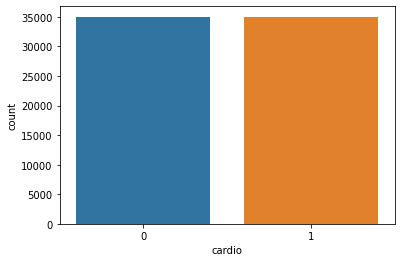

In [ ]:
# Check how many samples of each class there are and plot it 
sns.countplot(df['cardio'])

**Comment:** In the dataset, sample taken from cardiovascular disease and non cardiovascular disease are equally distributed

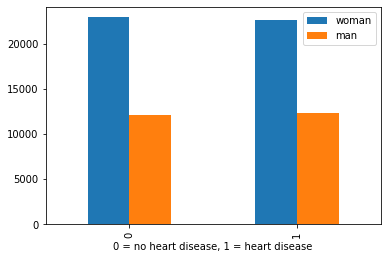

In [ ]:
# use pd.crosstab to check the heart disease frequency acording to the gender and plot it
pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no heart disease, 1 = heart disease')
plt.legend(['woman','man'])
plt.show()

**Comment:**
We can se that it is more common for women to have heart disease in this dataset.

**View the distribution of the age using a histogram (remember that the age is in days)**

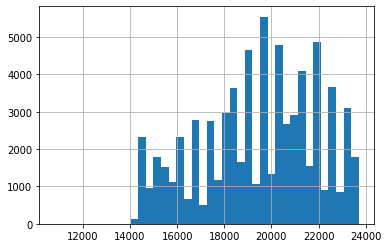

In [ ]:
df['age'].T.hist(bins = 40)
plt.show()

In [ ]:
# now age convert into year
df['yr']=(df['age']/ 365).round(0)

In [ ]:
df.drop(labels = 'age', axis = 1, inplace = True)


In [ ]:
# know the data statistics
df.describe() # for know the mean, median, and percentile

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700,53.338686
std,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003,6.765294
min,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,30.000000
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,65.000000


**Observations from the statistics description:**
* minumum age recorded is 30 years old
* height(cm) and weight(kg) are objective features
1. height - min: 55cm
2. weight - min: 10kg
* ap_hi and ap_lo are examination features and both recorded extremes values
* ap_hi - min:-150 and max:16020
* ap_low - min:-70 and max:11000

In [ ]:
df_cor = df.corr() # to know the correlation between
display(df_cor)

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,yr
gender,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,-0.020491,0.338135,0.170966,0.005866,0.008109,-0.023017
height,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,-0.018595,0.187989,0.094419,-0.006570,-0.010821,-0.081456
weight,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.106857,0.067780,0.067113,-0.016867,0.181660,0.053661
ap_hi,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,0.011841,-0.000922,0.001408,-0.000033,0.054475,0.020793
ap_lo,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.010806,0.005186,0.010601,0.004780,0.065719,0.017754
cholesterol,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.451578,0.010354,0.035760,0.009911,0.221147,0.154386
gluc,-0.020491,-0.018595,0.106857,0.011841,0.010806,0.451578,1.000000,-0.004756,0.011246,-0.006770,0.089307,0.098596
smoke,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,-0.004756,1.000000,0.340094,0.025858,-0.015486,-0.047884
alco,0.170966,0.094419,0.067113,0.001408,0.010601,0.035760,0.011246,0.340094,1.000000,0.025476,-0.007330,-0.029918
active,0.005866,-0.006570,-0.016867,-0.000033,0.004780,0.009911,-0.006770,0.025858,0.025476,1.000000,-0.035653,-0.009819


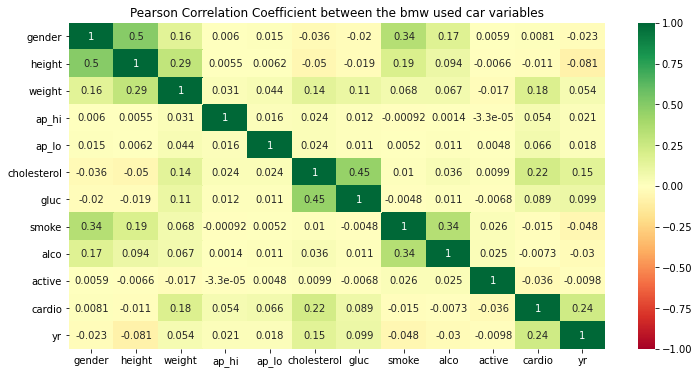

In [ ]:
# show a heatmap of the correlations.
plt.figure(figsize=(12,6))
sns.heatmap(df_cor, annot=True, cmap="RdYlGn", vmax=1, vmin=-1)
plt.title("Pearson Correlation Coefficient between the bmw used car variables")
plt.show()

**Comment:** We can se a positive correlation betweeen the gender an if the patient smoke or not, lets see it in a bar graph

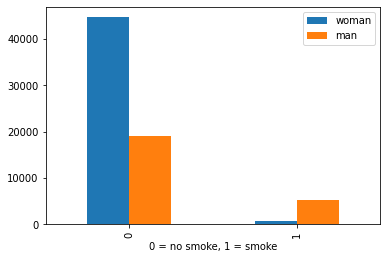

In [ ]:
pd.crosstab(df['smoke'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no smoke, 1 = smoke')
plt.legend(['woman','man'])
plt.show()

**Comment:** In proportion, there are many more male smokers than female smokers

**Creating models**

In [ ]:
# Split data into X and y
x=df.drop(['cardio'], axis=1)
y=df['cardio']

In [ ]:
# split the data into training and test datasets
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=0.30, random_state=1)

In [ ]:
# random forest classifier use
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# create obj of classifier
objraf=RandomForestClassifier()

In [ ]:
objraf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# evaluate the stock model on test data
objraf.score(xtest,ytest)

0.7077619047619048

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
objdtc=DecisionTreeClassifier()

In [ ]:
objdtc.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
objdtc.score(xtest,ytest)


0.628

### **Feature Selection:**
Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve. How to select features and what are the Benefits of performing feature selection before modeling your data?
1. Reduces Overfitting: Less redundant data means less opportunity to make decisions based on noise.
2. Improves Accuracy: Less misleading data means modeling accuracy improves.
3· Reduces Training Time: fewer data points reduce algorithm complexity and algorithms train faster.

In [ ]:
# now use feature selection tecnique for remove the unimportance feature
# univeraiate selection methond and algorithm is select k based algorithm is used here
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
# now create a object
obj_fit= SelectKBest(score_func=f_classif)

In [ ]:
obj_fit.fit(x,y)

SelectKBest(k=10, score_func=<function f_classif at 0x7fb7bafc6cb0>)

In [ ]:
# now score find for every coloumn in the datafram
score_col= pd.DataFrame(obj_fit.scores_, columns=['score_value'])

In [ ]:
score_col

,score_value
0,1.010461
1,4209.007957
2,4.603641
3,8.197397
4,2388.777887
5,208.339524
6,303.629011
7,3599.361137
8,562.772977
9,16.790541


In [ ]:
Name_col=pd.DataFrame(x.columns)

In [ ]:
# now concateion score_column and Name_column
top_fea=pd.concat([Name_col, score_col], axis=1)

In [ ]:
top_fea.nlargest(13,'score_value')

,0,score_value
1,age,4209.007957
7,cholesterol,3599.361137
4,weight,2388.777887
8,gluc,562.772977
6,ap_lo,303.629011
5,ap_hi,208.339524
11,active,89.091494
9,smoke,16.790541
3,height,8.197397
2,gender,4.603641


In [ ]:
# using top 8 feature again train the model
x1=df.drop(['height','gender','alco','cardio'], axis=1)
y1=df['cardio']

In [ ]:
xtrain,xtest,ytrain,ytest= train_test_split(x1,y1, test_size=0.30, random_state=1)


In [ ]:
# create obj of classifier
objraf1=RandomForestClassifier()

In [ ]:
objraf1.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
objraf1.score(xtest,ytest)

0.7171428571428572

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

In [ ]:
# now obj for extraTreesClssifier
model= ExtraTreesClassifier()

In [ ]:
model.fit(x,y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [ ]:
model.feature_importances_ # here feature importancr for 1st to 11 column

array([0.1590663 , 0.20507054, 0.0069231 , 0.13635817, 0.14682827,
       0.16791448, 0.10578661, 0.04532656, 0.01181546, 0.00485639,
       0.00474796, 0.00530615])

In [ ]:
## now using the bar chart we can see
top=pd.Series(model.feature_importances_, index=x.columns)

In [ ]:
top

id             0.159066
age            0.205071
gender         0.006923
height         0.136358
weight         0.146828
ap_hi          0.167914
ap_lo          0.105787
cholesterol    0.045327
gluc           0.011815
smoke          0.004856
alco           0.004748
active         0.005306
dtype: float64

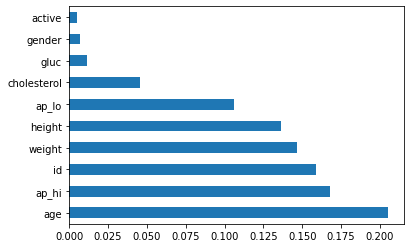

In [ ]:
top.nlargest(10).plot(kind='barh') # here is fig in bar chart
plt.show()